In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
data = pd.read_csv("CS253_Assign.csv")
data.replace('?', pd.NaT, inplace=True)
cols = data.columns.tolist()
# print(data.info())
#dropping columns having a lot of null value
new_cols = [col for i, col in enumerate(cols) if i not in [26,27,14,21]]
data = data[new_cols]
#separating each column independently as a separate target variable
y1=data['Hinselmann'].copy()
y2=data['Schiller'].copy()
y3=data['Citology'].copy()
y4=data['Biopsy'].copy()
data=data.drop(['Hinselmann','Schiller','Citology','Biopsy'], axis=1)
# print(data.info())
num_cols =  data.select_dtypes(include=np.number).columns
print(num_cols.shape)
for col in num_cols:
    data[col].fillna(data[col].median(), inplace=True)
cat_cols = data.select_dtypes(include='object').columns
print(cat_cols.shape)
for col in cat_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)
    num_cols = data.select_dtypes(include=np.number).columns
data = data.astype(float)
print(data.info())

(6,)
(22,)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 28 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    float64
 1   Number of sexual partners           858 non-null    float64
 2   First sexual intercourse            858 non-null    float64
 3   Num of pregnancies                  858 non-null    float64
 4   Smokes                              858 non-null    float64
 5   Smokes (years)                      858 non-null    float64
 6   Smokes (packs/year)                 858 non-null    float64
 7   Hormonal Contraceptives             858 non-null    float64
 8   Hormonal Contraceptives (years)     858 non-null    float64
 9   IUD                                 858 non-null    float64
 10  IUD (years)                         858 non-null    float64
 11  STDs                              

In [2]:
num_cols = data.select_dtypes(include=np.number).columns
#Identify and Remove the outliers.
lower_pct=1
upper_pct=99
int_cols = data.select_dtypes(include=np.number).columns
for col in int_cols:
    lower_limit = data[col].quantile(lower_pct/100.0)
    upper_limit = data[col].quantile(upper_pct/100.0)
    data[col] = data[col].clip(lower=lower_limit, upper=upper_limit)
#Normalize the data
def normalize(column):
    if column.max()!=column.min():
       return (column - column.min()) / (column.max() - column.min())

# apply the function to each column using the apply method and axis=0
data = data.apply(normalize, axis=0)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 28 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    float64
 1   Number of sexual partners           858 non-null    float64
 2   First sexual intercourse            858 non-null    float64
 3   Num of pregnancies                  858 non-null    float64
 4   Smokes                              858 non-null    float64
 5   Smokes (years)                      858 non-null    float64
 6   Smokes (packs/year)                 858 non-null    float64
 7   Hormonal Contraceptives             858 non-null    float64
 8   Hormonal Contraceptives (years)     858 non-null    float64
 9   IUD                                 858 non-null    float64
 10  IUD (years)                         858 non-null    float64
 11  STDs                                858 non-n

In [3]:
cols = data.columns.tolist()
# print(data.info())
#dropping columns having a lot of null value
new_cols = [col for i, col in enumerate(cols) if i not in [14,17,18,19,21,22]]
data = data[new_cols]

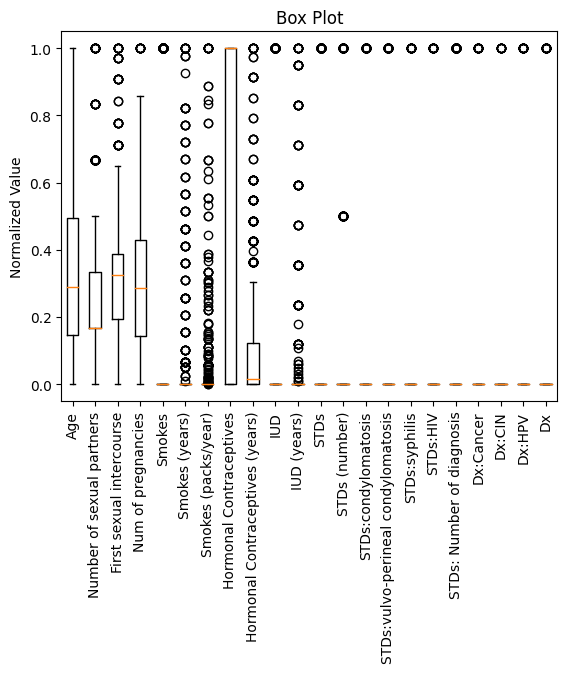

In [4]:
# create the box plot
fig, ax = plt.subplots()
ax.boxplot(data.values)

# set the labels and title
ax.set_xticklabels(data.columns, rotation=90)
ax.set_ylabel('Normalized Value')
ax.set_title('Box Plot')

# show the plot
plt.show()


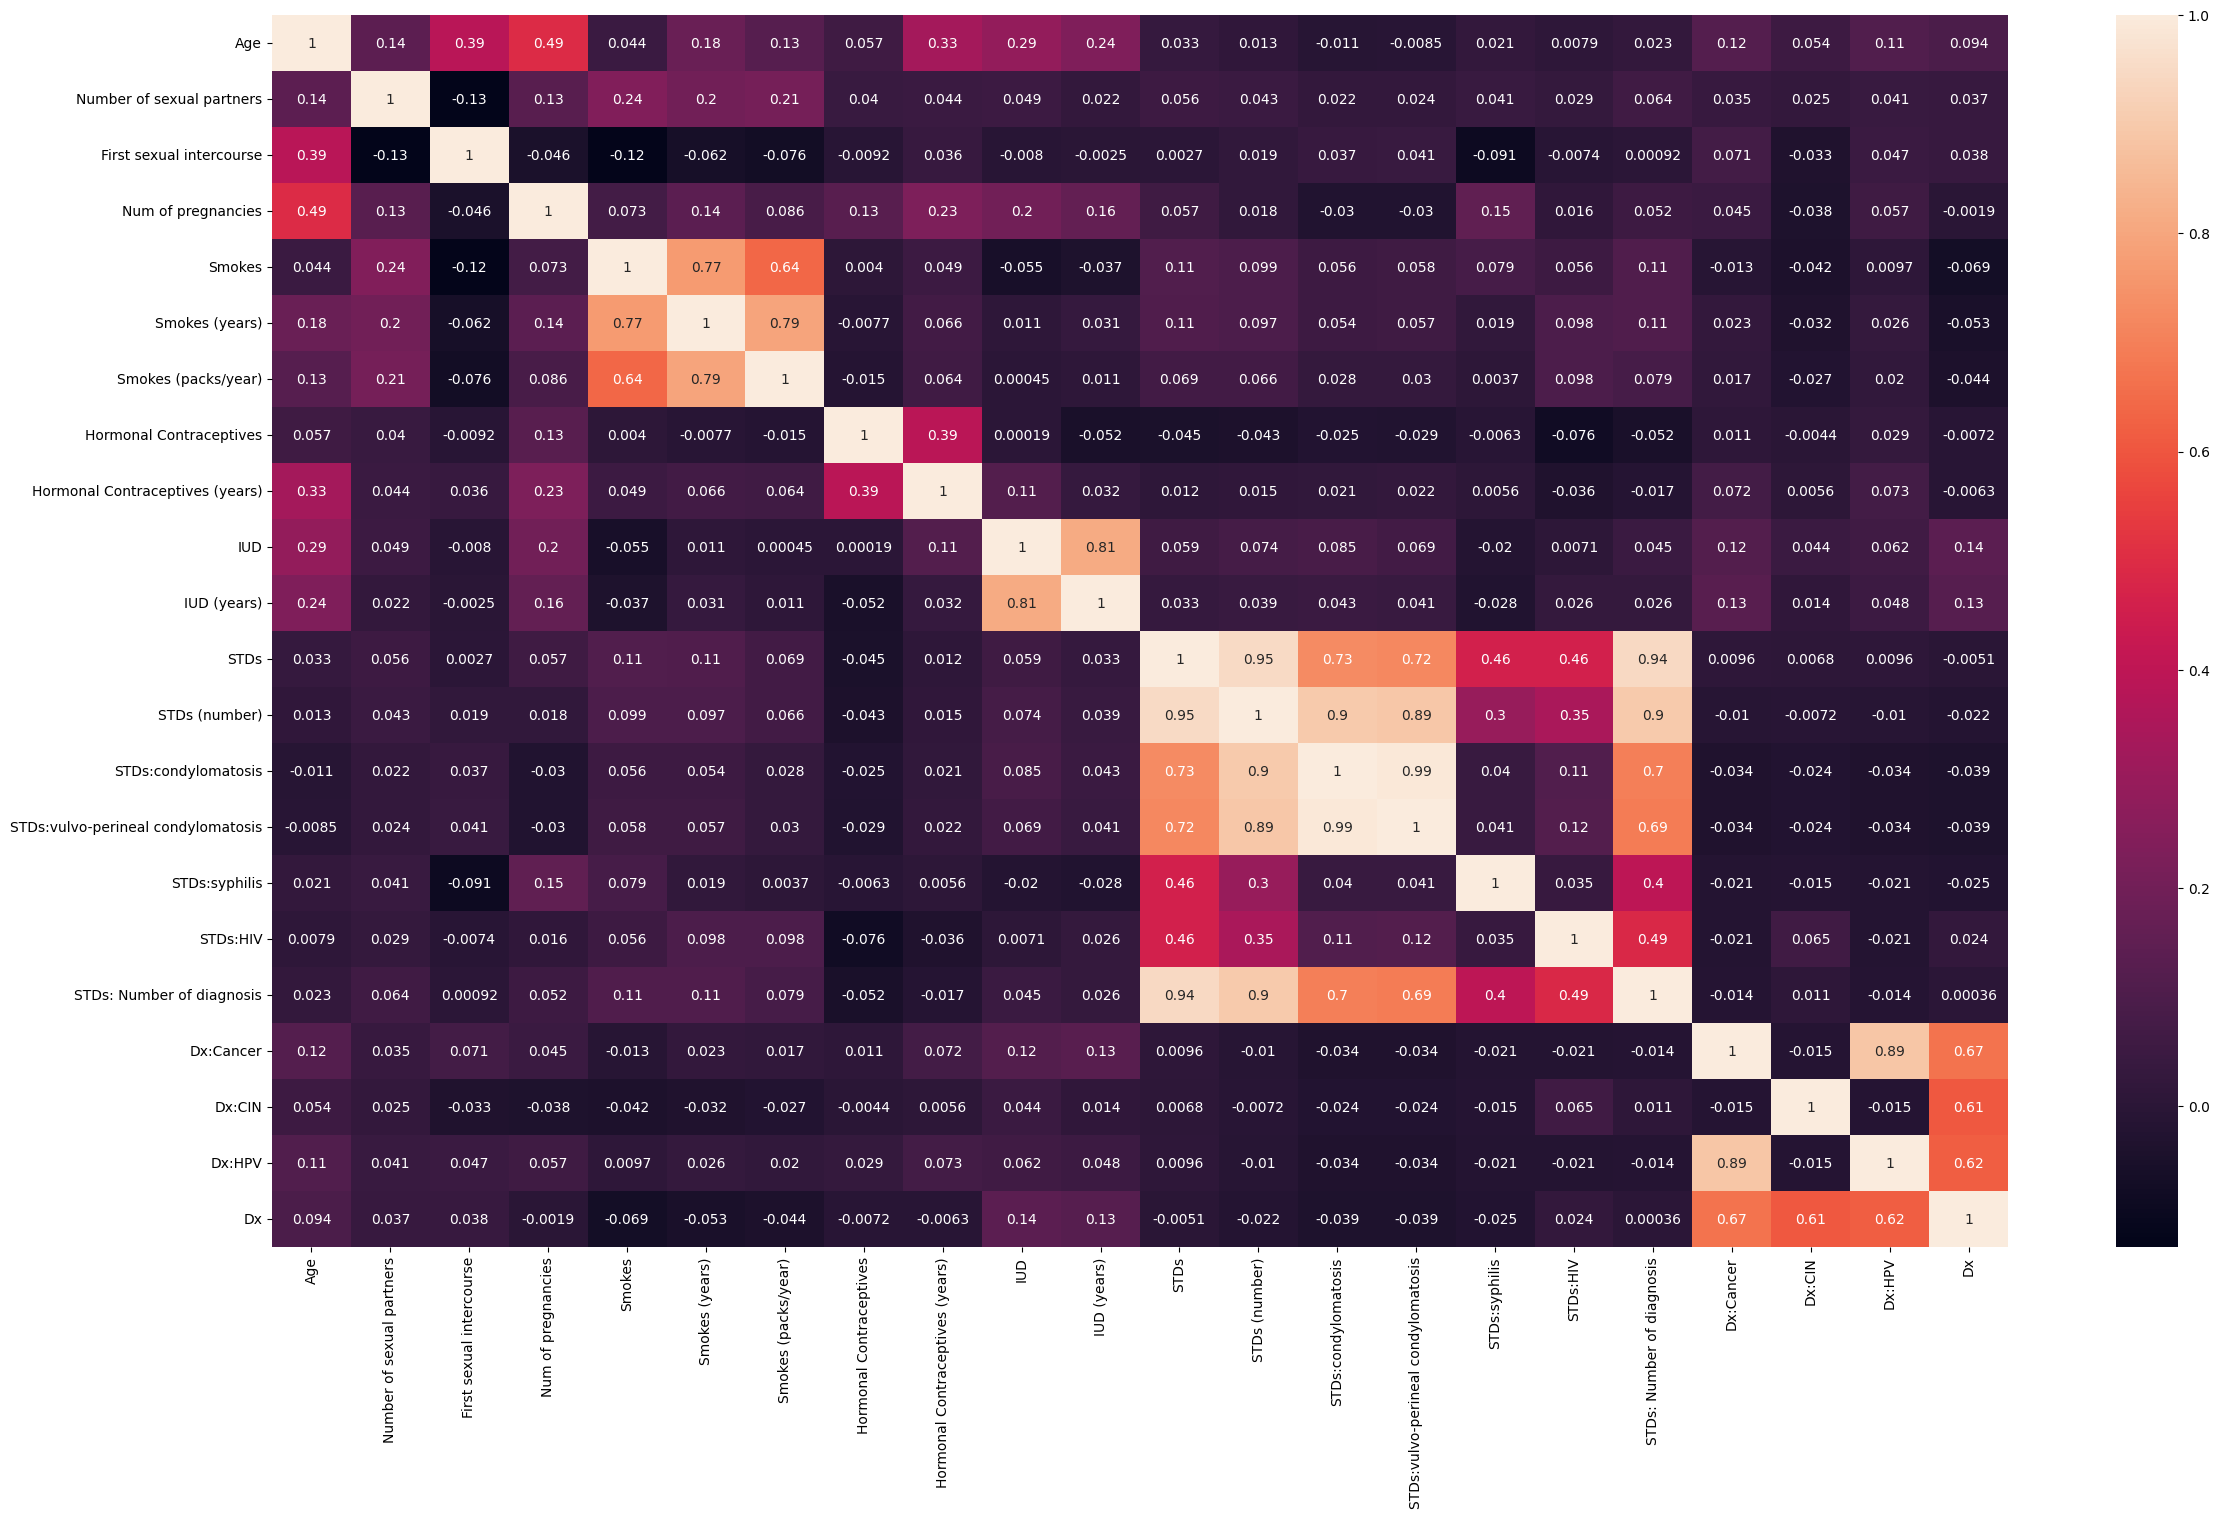

In [5]:
plt.figure(figsize=(28, 16))
sns.heatmap(data.corr(),annot=True)
plt.show()

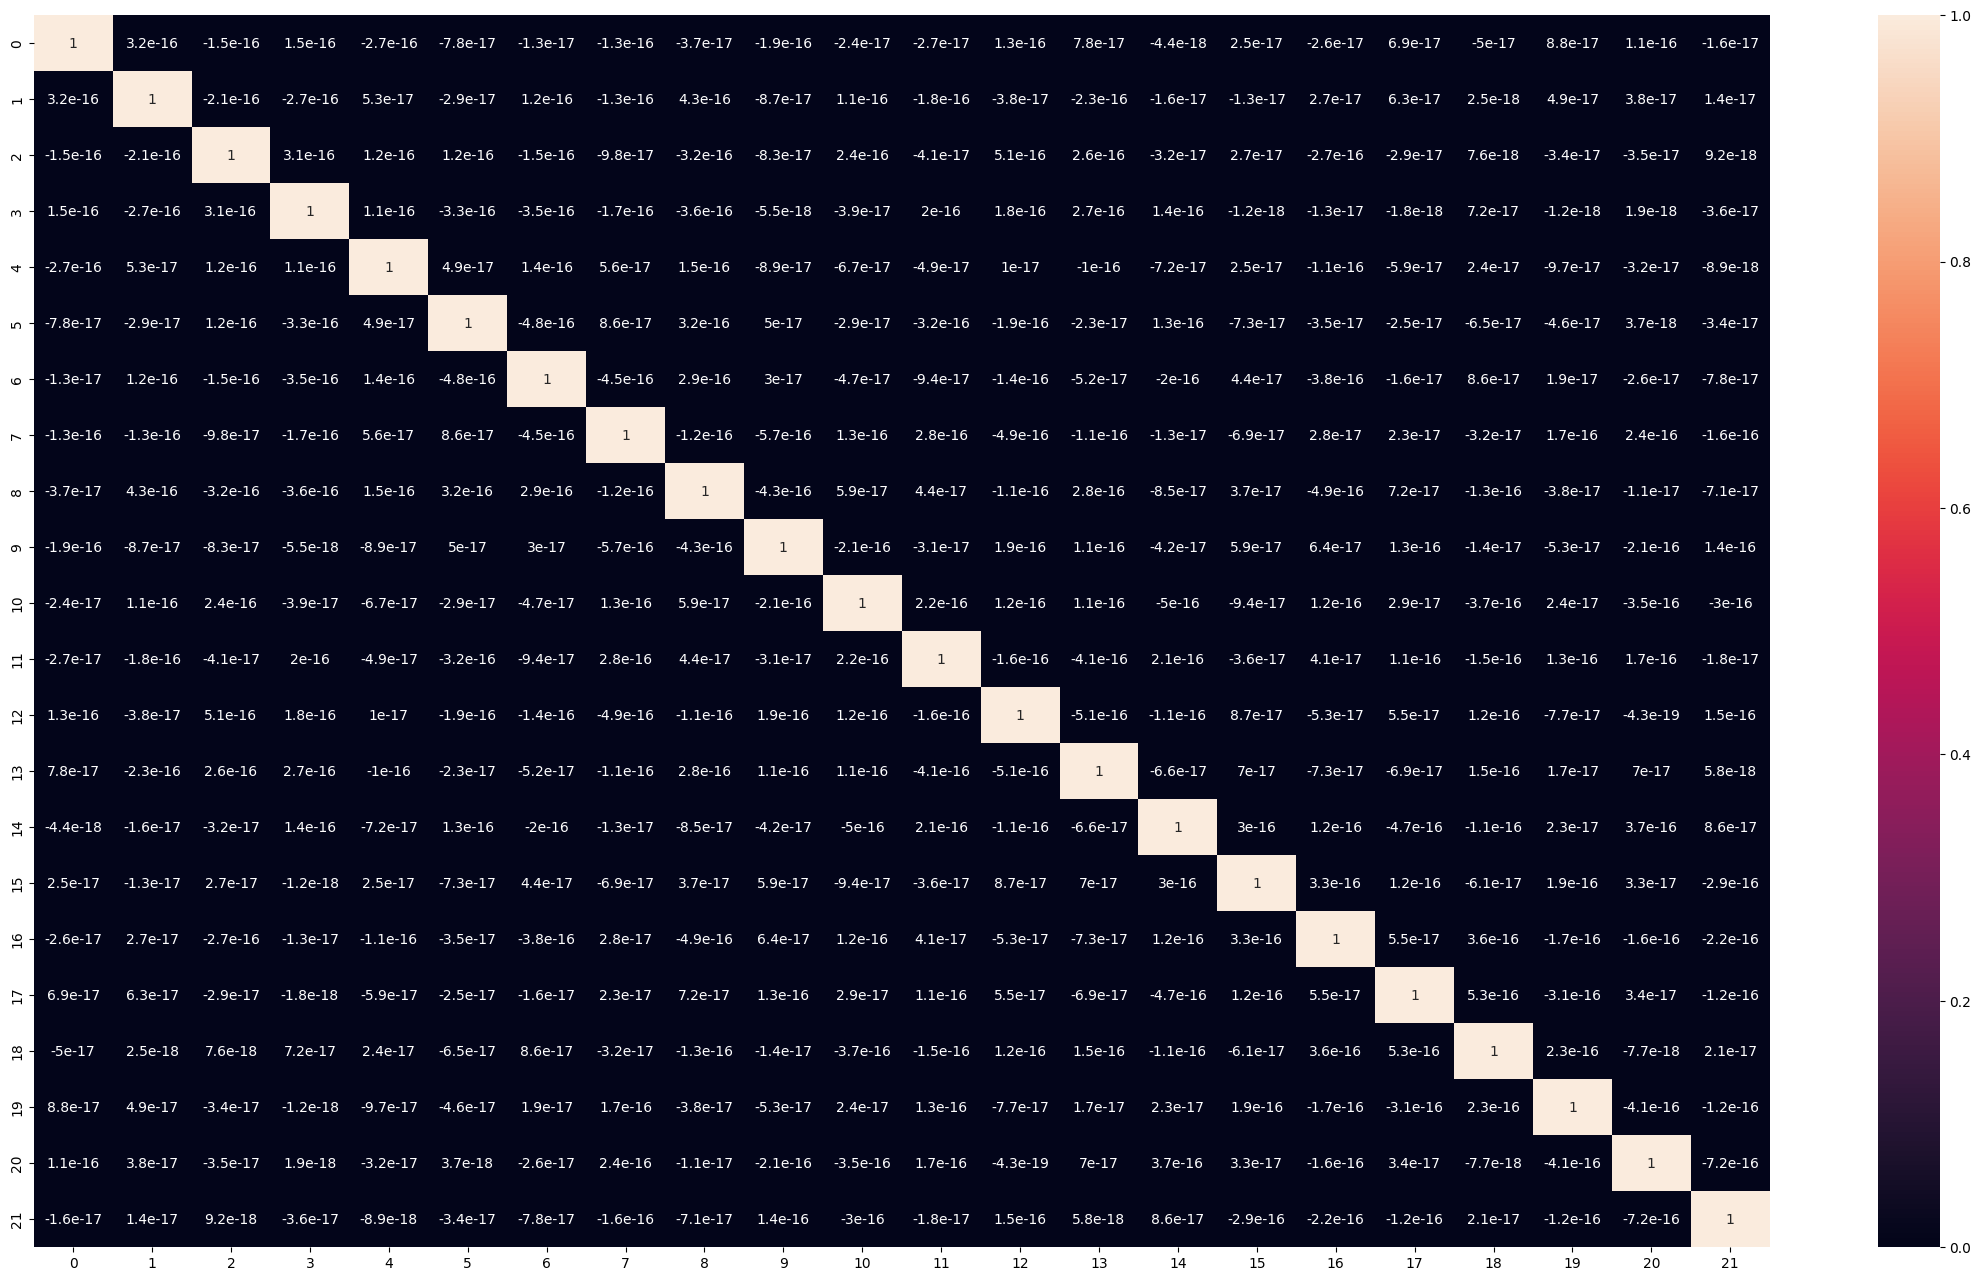

In [6]:
pca = PCA()
X_pca = pca.fit_transform(data)
data=pd.DataFrame(data=X_pca)
plt.figure(figsize=(28, 16))
sns.heatmap(data.corr(),annot=True)
# sns.heatmap(data.corr(),annot=True,cmap="YlGnBu")
plt.show()

In [7]:
# num_cols =  data.select_dtypes(include=np.number).columns
# scaler = StandardScaler()
# data[num_cols] = scaler.fit_transform(data[num_cols])


In [8]:
labels=['Hinselmann','Schiller','Citology','Biopsy']
accuracy_t=[]
prec_t=[]
recall_t=[]
f1_t=[]
accuracy_t1=[]
prec_t1=[]
recall_t1=[]
f1_t1=[]

KNN for Hinselmann
Accuracy:  0.8023255813953488
Precision:  0.8739554283774279
Recall Score  0.8023255813953488
f1:  0.8304457568554414
SVM for Hinselmann
Accuracy:  0.7965116279069767
Precision:  0.8282723130106852
Recall Score  0.7965116279069767
f1:  0.811532060750034


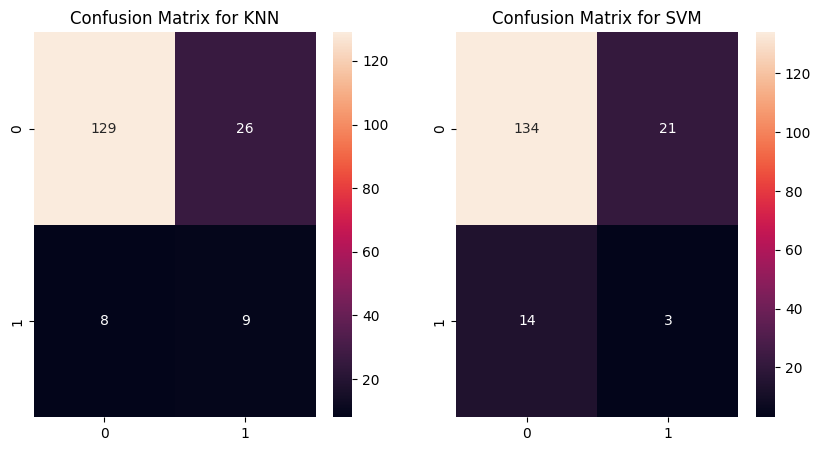

In [9]:
X_train, X_test, y_train, y_test = train_test_split(data, y2, test_size=0.2, random_state=42)#split
smote=SMOTE(random_state=35)
X1,y1r=smote.fit_resample(X_train,y_train)#overample balancing
clf2 = KNeighborsClassifier(n_neighbors=1, weights='uniform')
clf2.fit(X1, y1r)
y_pred = clf2.predict(X_test)
# print(classification_report(y_test1, y_pred1))
print("KNN for Hinselmann")
acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)

precision=precision_score(y_test, y_pred,average='weighted')
print("Precision: ", precision)
rec = recall_score(y_test, y_pred,average='weighted')
print("Recall Score ", rec)
f1 = f1_score(y_test, y_pred,average='weighted')
print("f1: ", f1)

accuracy_t.append(acc)
prec_t.append(precision)
recall_t.append(rec)
f1_t.append(f1)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', ax=ax[0])
ax[0].set_title('Confusion Matrix for KNN')

svm_classifier = SVC()

# Define a dictionary of hyperparameters to search over using a logarithmic scale
# The 'C' and 'gamma' parameters are tuned over a range of values that span five orders of magnitude, from 0.001 to 100
svc_param_grid = {'C': np.logspace(-3, 2, 6), 'gamma': np.logspace(-3, 2, 6)}

# Define a list of candidate kernels to search over
# The 'linear', 'rbf', and 'sigmoid' kernels are the most common kernels used with SVM classifiers
kernels = ['linear', 'rbf', 'sigmoid']

# Add the kernels to the hyperparameter dictionary using the 'kernel' key
# The 'kernel' parameter determines the type of decision boundary used by the SVM classifier
svc_param_grid['kernel'] = kernels

# Perform a grid search with cross-validation to find the best hyperparameters for the SVM classifier
# GridSearchCV exhaustively searches over the hyperparameter space and performs k-fold cross-validation to estimate the model performance
# The best hyperparameters are those that result in the highest mean cross-validated score across all folds
svm_classifier_cv = GridSearchCV(svm_classifier, svc_param_grid, cv=5)
svm_classifier_cv.fit(X1, y1r)

y_pred= svm_classifier_cv.predict(X_test) # predict using clf2
print("SVM for Hinselmann")
acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)

precision=precision_score(y_test, y_pred,average='weighted')
print("Precision: ", precision)
rec = recall_score(y_test, y_pred,average='weighted')
print("Recall Score ", rec)
f1 = f1_score(y_test, y_pred,average='weighted')
print("f1: ", f1)
cm2 = confusion_matrix(y_test, y_pred)
sns.heatmap(cm2, annot=True, fmt='d', ax=ax[1])
ax[1].set_title('Confusion Matrix for SVM')
accuracy_t1.append(acc)
prec_t1.append(precision)
recall_t1.append(rec)
f1_t1.append(f1)
plt.show()

KNN for Schiller
Accuracy:  0.8837209302325582
Precision:  0.9302828953991745
Recall Score  0.8837209302325582
f1:  0.9042540025427256
SVM for Hinselmann
Accuracy:  0.9069767441860465
Precision:  0.9169394200401954
Recall Score  0.9069767441860465
f1:  0.911859355431905


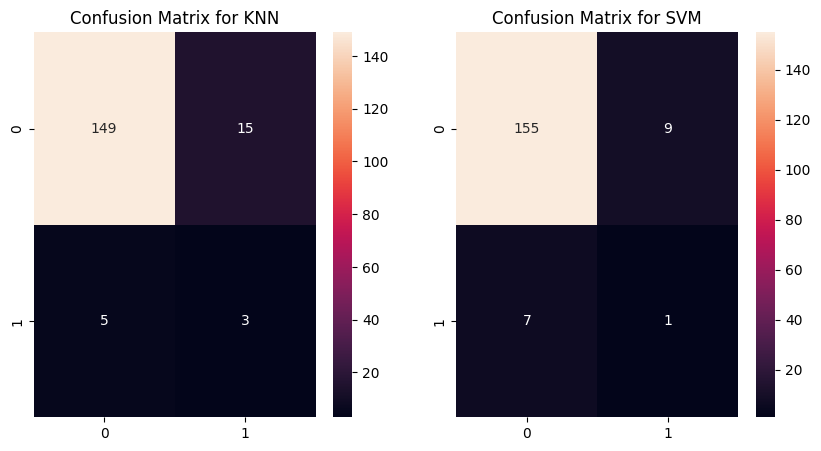

In [10]:
X_train, X_test, y_train, y_test = train_test_split(data, y1, test_size=0.2, random_state=42)#split
smote=SMOTE(random_state=35)
X1,y1r=smote.fit_resample(X_train,y_train)#overample balancing
clf2 = KNeighborsClassifier(n_neighbors=1, weights='uniform')
clf2.fit(X1, y1r)
y_pred = clf2.predict(X_test)
# print(classification_report(y_test1, y_pred1))
print("KNN for Schiller")
acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)

precision=precision_score(y_test, y_pred,average='weighted')
print("Precision: ", precision)
rec = recall_score(y_test, y_pred,average='weighted')
print("Recall Score ", rec)
f1 = f1_score(y_test, y_pred,average='weighted')
print("f1: ", f1)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', ax=ax[0])
ax[0].set_title('Confusion Matrix for KNN')
accuracy_t.append(acc)
prec_t.append(precision)
recall_t.append(rec)
f1_t.append(f1)
svm_classifier = SVC()

# Define a dictionary of hyperparameters to search over using a logarithmic scale
# The 'C' and 'gamma' parameters are tuned over a range of values that span five orders of magnitude, from 0.001 to 100
svc_param_grid = {'C': np.logspace(-3, 2, 6), 'gamma': np.logspace(-3, 2, 6)}

# Define a list of candidate kernels to search over
# The 'linear', 'rbf', and 'sigmoid' kernels are the most common kernels used with SVM classifiers
kernels = ['linear', 'rbf', 'sigmoid']

# Add the kernels to the hyperparameter dictionary using the 'kernel' key
# The 'kernel' parameter determines the type of decision boundary used by the SVM classifier
svc_param_grid['kernel'] = kernels

# Perform a grid search with cross-validation to find the best hyperparameters for the SVM classifier
# GridSearchCV exhaustively searches over the hyperparameter space and performs k-fold cross-validation to estimate the model performance
# The best hyperparameters are those that result in the highest mean cross-validated score across all folds
svm_classifier_cv = GridSearchCV(svm_classifier, svc_param_grid, cv=5)
svm_classifier_cv.fit(X1, y1r)

y_pred= svm_classifier_cv.predict(X_test) # predict using clf2
print("SVM for Hinselmann")
acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)

precision=precision_score(y_test, y_pred,average='weighted')
print("Precision: ", precision)
rec = recall_score(y_test, y_pred,average='weighted')
print("Recall Score ", rec)
f1 = f1_score(y_test, y_pred,average='weighted')
print("f1: ", f1)
cm2 = confusion_matrix(y_test, y_pred)
sns.heatmap(cm2, annot=True, fmt='d', ax=ax[1])
ax[1].set_title('Confusion Matrix for SVM')
accuracy_t1.append(acc)
prec_t1.append(precision)
recall_t1.append(rec)
f1_t1.append(f1)
plt.show()

KNN for Citology
Accuracy:  0.877906976744186
Precision:  0.9398106738223018
Recall Score  0.877906976744186
f1:  0.9078047375620996
SVM for Citology
Accuracy:  0.8488372093023255
Precision:  0.938780224857539
Recall Score  0.8488372093023255
f1:  0.8915459997074741


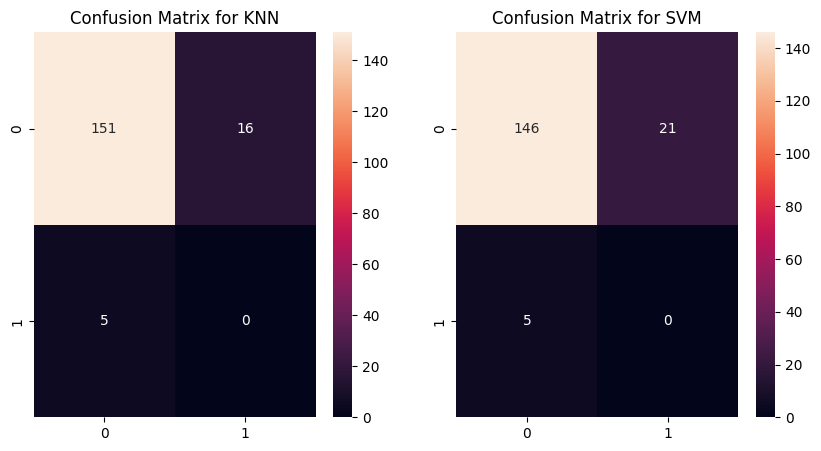

In [11]:
X_train, X_test, y_train, y_test = train_test_split(data, y3, test_size=0.2, random_state=42)#split
smote=SMOTE(random_state=35)
X1,y1r=smote.fit_resample(X_train,y_train)#overample balancing
clf2 = KNeighborsClassifier(n_neighbors=1, weights='uniform')
clf2.fit(X1, y1r)
y_pred = clf2.predict(X_test)
# print(classification_report(y_test1, y_pred1))
print("KNN for Citology")
acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)

precision=precision_score(y_test, y_pred,average='weighted')
print("Precision: ", precision)
rec = recall_score(y_test, y_pred,average='weighted')
print("Recall Score ", rec)
f1 = f1_score(y_test, y_pred,average='weighted')
print("f1: ", f1)
accuracy_t.append(acc)
prec_t.append(precision)
recall_t.append(rec)
f1_t.append(f1)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', ax=ax[0])
ax[0].set_title('Confusion Matrix for KNN')
svm_classifier = SVC()

# Define a dictionary of hyperparameters to search over using a logarithmic scale
# The 'C' and 'gamma' parameters are tuned over a range of values that span five orders of magnitude, from 0.001 to 100
svc_param_grid = {'C': np.logspace(-3, 2, 6), 'gamma': np.logspace(-3, 2, 6)}

# Define a list of candidate kernels to search over
# The 'linear', 'rbf', and 'sigmoid' kernels are the most common kernels used with SVM classifiers
kernels = ['linear', 'rbf', 'sigmoid']

# Add the kernels to the hyperparameter dictionary using the 'kernel' key
# The 'kernel' parameter determines the type of decision boundary used by the SVM classifier
svc_param_grid['kernel'] = kernels

# Perform a grid search with cross-validation to find the best hyperparameters for the SVM classifier
# GridSearchCV exhaustively searches over the hyperparameter space and performs k-fold cross-validation to estimate the model performance
# The best hyperparameters are those that result in the highest mean cross-validated score across all folds
svm_classifier_cv = GridSearchCV(svm_classifier, svc_param_grid, cv=5)
svm_classifier_cv.fit(X1, y1r)

y_pred= svm_classifier_cv.predict(X_test) # predict using clf2
print("SVM for Citology")
acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)

precision=precision_score(y_test, y_pred,average='weighted')
print("Precision: ", precision)
rec = recall_score(y_test, y_pred,average='weighted')
print("Recall Score ", rec)
f1 = f1_score(y_test, y_pred,average='weighted')
print("f1: ", f1)
cm2 = confusion_matrix(y_test, y_pred)
sns.heatmap(cm2, annot=True, fmt='d', ax=ax[1])
ax[1].set_title('Confusion Matrix for SVM')
accuracy_t1.append(acc)
prec_t1.append(precision)
recall_t1.append(rec)
f1_t1.append(f1)
plt.show()

KNN for Biopsy
Accuracy:  0.8430232558139535
Recall Score  0.8430232558139535
Precision:  0.902432956212026
f1:  0.8688739799374253
SVM for Biopsy
Accuracy:  0.8255813953488372
Recall Score  0.8255813953488372
Precision:  0.8687490500075999
f1:  0.8466153162494445


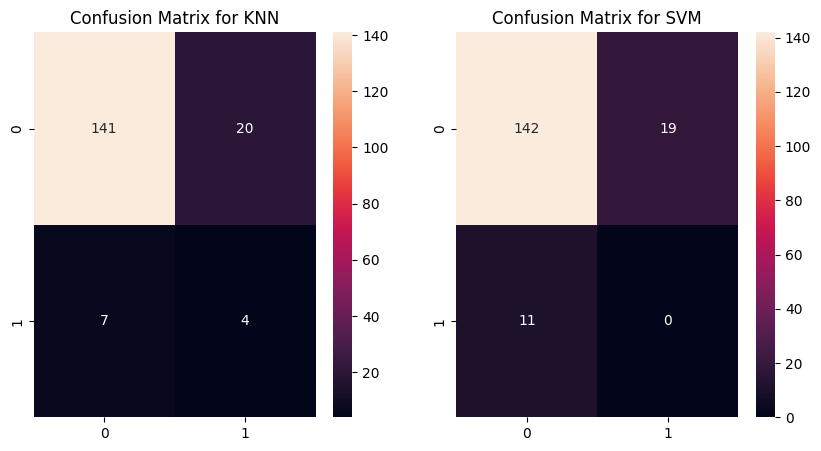

In [12]:
X_train, X_test, y_train, y_test = train_test_split(data, y4, test_size=0.2, random_state=42)#split
smote=SMOTE(random_state=35)
X1,y1r=smote.fit_resample(X_train,y_train)#overample balancing
clf2 = KNeighborsClassifier(n_neighbors=1, weights='uniform')
clf2.fit(X1, y1r)
y_pred = clf2.predict(X_test)
# print(classification_report(y_test1, y_pred1))
print("KNN for Biopsy")
acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)
rec = recall_score(y_test, y_pred,average='weighted')
print("Recall Score ", rec)
precision=precision_score(y_test, y_pred,average='weighted')
print("Precision: ", precision)

f1 = f1_score(y_test, y_pred,average='weighted')
print("f1: ", f1)
accuracy_t.append(acc)
prec_t.append(precision)
recall_t.append(rec)
f1_t.append(f1)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', ax=ax[0])
ax[0].set_title('Confusion Matrix for KNN')
svm_classifier = SVC()

# Define a dictionary of hyperparameters to search over using a logarithmic scale
# The 'C' and 'gamma' parameters are tuned over a range of values that span five orders of magnitude, from 0.001 to 100
svc_param_grid = {'C': np.logspace(-3, 2, 6), 'gamma': np.logspace(-3, 2, 6)}

# Define a list of candidate kernels to search over
# The 'linear', 'rbf', and 'sigmoid' kernels are the most common kernels used with SVM classifiers
kernels = ['linear', 'rbf', 'sigmoid']

# Add the kernels to the hyperparameter dictionary using the 'kernel' key
# The 'kernel' parameter determines the type of decision boundary used by the SVM classifier
svc_param_grid['kernel'] = kernels

# Perform a grid search with cross-validation to find the best hyperparameters for the SVM classifier
# GridSearchCV exhaustively searches over the hyperparameter space and performs k-fold cross-validation to estimate the model performance
# The best hyperparameters are those that result in the highest mean cross-validated score across all folds
svm_classifier_cv = GridSearchCV(svm_classifier, svc_param_grid, cv=5)
svm_classifier_cv.fit(X1, y1r)

y_pred= svm_classifier_cv.predict(X_test) # predict using clf2
print("SVM for Biopsy")
acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)
rec = recall_score(y_test, y_pred,average='weighted')
print("Recall Score ", rec)
precision=precision_score(y_test, y_pred,average='weighted')
print("Precision: ", precision)

f1 = f1_score(y_test, y_pred,average='weighted')
print("f1: ", f1)
cm2 = confusion_matrix(y_test, y_pred)
sns.heatmap(cm2, annot=True, fmt='d', ax=ax[1])
ax[1].set_title('Confusion Matrix for SVM')
accuracy_t1.append(acc)
prec_t1.append(precision)
recall_t1.append(rec)
f1_t1.append(f1)
plt.show()


In [13]:
from tabulate import tabulate
print("KNN")
accuracy_t.append("Accuracy")
prec_t.append("Precision")
recall_t.append("Recall score")
f1_t.append("f1 score")
labels.append("")
data = [accuracy_t,prec_t,recall_t,f1_t]
print (tabulate(data, headers=labels))

KNN
  Hinselmann    Schiller    Citology    Biopsy
------------  ----------  ----------  --------  ------------
    0.802326    0.883721    0.877907  0.843023  Accuracy
    0.873955    0.930283    0.939811  0.902433  Precision
    0.802326    0.883721    0.877907  0.843023  Recall score
    0.830446    0.904254    0.907805  0.868874  f1 score


In [14]:
print("SVM")
accuracy_t1.append("Accuracy")
prec_t1.append("Precision")
recall_t1.append("Recall score")
f1_t1.append("f1 score")
data = [accuracy_t1,prec_t1,recall_t1,f1_t1]
print (tabulate(data, headers=labels))

SVM
  Hinselmann    Schiller    Citology    Biopsy
------------  ----------  ----------  --------  ------------
    0.796512    0.906977    0.848837  0.825581  Accuracy
    0.828272    0.916939    0.93878   0.868749  Precision
    0.796512    0.906977    0.848837  0.825581  Recall score
    0.811532    0.911859    0.891546  0.846615  f1 score
